In [1]:
import sys
REL_DIR  = "../../../"
sys.path.append(REL_DIR)

# Getting Started

## Installation

The latest version of the paminco package and the necessary dependencies can be installed directly 
from GitHub using ``pip``:

```bash
pip install git+https://github.com/paminco/paminco.git@setup_tester
```

## Simple MCA example

Consider the following graph where four vertices ($s, v_1, v_2, t$) are connected with five edges. 
<!-- ```{figure} img/graph.png
---
width: 300px
name: example-graph
---
Example graph with cost functions.
``` -->
<center>
<img src="graph.png" width=300>
</center>

For each edge a cost function $F_e$ is specified, e.g. the cost on edge $e_1$ given an edge flow $x_1$ 
are $F_{e_1}(x_1) = x_1^2$.
We can setup the above network by specifying edge, cost and demand data as follows:

In [2]:
import numpy as np
from paminco import Network, MCA

edge_data = np.array([[ "s", "v1"],
                      [ "s", "v2"],
                      ["v1", "v2"],
                      ["v1",  "t"],
                      ["v2",  "t"]])
poly_cost = np.array([[0, 0, 1],   # F_0(x) = 0 * x^0 + 0 * x^1 + 1 * x^2
                      [0, 3, 0.5], # F_0(x) = 0 * x^0 + 3 * x^1 + 0.5 * x^2
                      [0, 0, 0.5],
                      [0, 3, 0.5],
                      [0, 0, 1]])
demand_data = (("s", "t", 1))
d = {"s": 0, "v1": 1, "v2": 2, "t": 3}  # determines how labels are mapped to indices
net = Network(edge_data,
              cost_data=poly_cost,
              demand_data=demand_data,
              kw_edge={"map_labels_to_indices": d})

ImportError: cannot import name 'Network' from 'paminco' (unknown location)

A parametric mincost flow can be found with the MCA algorithm:

In [10]:
mca = MCA(net, lambda_max=8)
mca.run(print=True)

Iteration    1 | λ ∈ [0.000, 1.000]   | ↑ e* = 3 ∈ E* = [1, 3]
Iteration    2 | λ ∈ [1.000, 1.000]   | ↑ e* = 1
Iteration    3 | λ ∈ [1.000, 6.000]   | ↓ e* = 2


This results in the following parametric edge flows, the mincost flow on an edge w.r.t. to the 
demand factor $\lambda$.

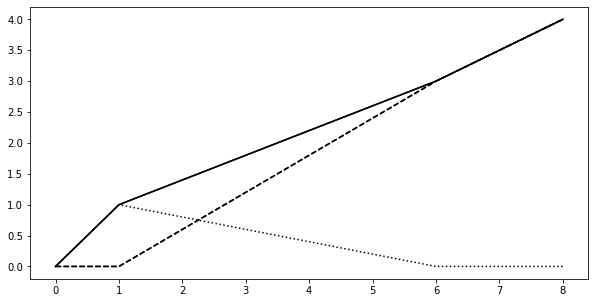

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(0, 8, 9)
mca.plot_flow_on_edge(0, x, ax=ax, color="black")
mca.plot_flow_on_edge(1, x, ax=ax, color="black", linestyle="dashed")
mca.plot_flow_on_edge(2, x, ax=ax, color="black", linestyle="dotted")
mca.plot_flow_on_edge(3, x, ax=ax, color="black", linestyle="dashed")
mca.plot_flow_on_edge(4, x, ax=ax, color="black")